In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [ ]:
import chardet
import pandas as pd

# # Detect the encoding of the file
# with open("spam.csv", 'rb') as file:
#     result = chardet.detect(file.read())
#     encoding = result['encoding']

# Read the CSV file with the detected encoding
data = pd.read_csv("spam.csv", encoding = 'latin-1')
data.head(10)

In [3]:
data.shape

(5572, 5)

In [4]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
data['v2'] = data['v2'].str.lower()

In [6]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
data["length"]=data['v2'].apply(len)

In [8]:
data.head()

,v1,v2,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

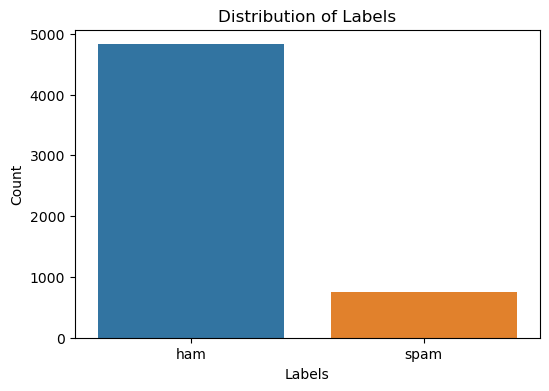

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

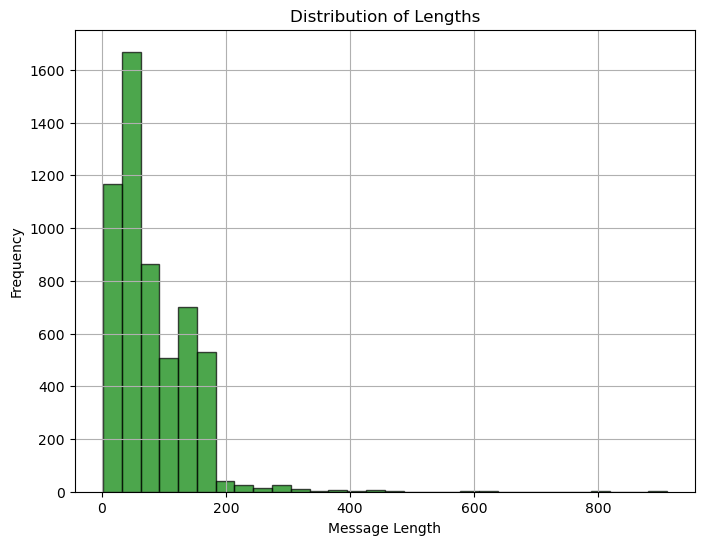

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(data['length'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
data.loc[:,'v1'] = data.v1.map({'ham':0,'spam':1})

C:\Users\raksh\AppData\Local\Temp\ipykernel_11728\638077824.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'v1'] = data.v1.map({'ham':0,'spam':1})


In [13]:
data.head()

,v1,v2,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [14]:
from sklearn.feature_extraction.text import CountVectorizer as CV
count = CV()

v2 = count.fit_transform(data['v2'])


<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [32]:
input = ["hello,how are you"]
text = count.fit_transform(data['v2'],input)

In [15]:
x = data["v1"]
y = data["v2"]

In [16]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(v2,x,test_size=0.2,random_state=42)

In [37]:
print(x_train.shape)
print(x_test.shape)

input = v2[5571]

(4457, 8672)
(1115, 8672)


In [30]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [19]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9802690582959641

In [21]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
precision

0.9923076923076923

In [22]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
recall

0.86

In [23]:
from sklearn.metrics import f1_score,confusion_matrix
f1 = f1_score(y_test,y_pred)
f1

0.9214285714285715

In [24]:
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"recall score: {recall}")
print(f"F1 score: {f1}")

Accuracy score: 0.9802690582959641
Precision score: 0.9923076923076923
recall score: 0.86
F1 score: 0.9214285714285715


In [25]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[964,   1],
       [ 21, 129]], dtype=int64)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["v2"])
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
def spam_msg_classifier(message):
    vectorized_msg = vectorizer.transform([message])
    if classifier.predict(vectorized_msg) == 1:
        print("Spam!!!!")
    else:
        print("Not Spam!!")

In [57]:
spam_msg_classifier("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

Not Spam!!


In [58]:
spam_msg_classifier("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

Spam!!!!


In [59]:
spam_msg_classifier("You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) ")

Spam!!!!


In [61]:
spam_msg_classifier("Goodo! Yes we must speak friday - egg-potato ratio for tortilla needed! ")

Not Spam!!
